# Model 3: PCA, outliers left in

Instead of selecting features by hand based on the coefficients with diagnosis in the correlation matrix, this model (logistic regression) will use PCA to reduce the feature space.

Therefore will use data_plus_encoded_diagnosis as this contains all features and all records (inc. outliers).

In [1]:
# load in the relevant libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load in the csv file
data_all_features = pd.read_csv("C:/Users/alsaw/OneDrive/Documents/2019-20 post India/Coding/CFG - python/Final Project/Team2_final_project/Data/Interim/data_with_encoded_diagnosis.csv")

In [3]:
# check it
data_all_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
Unnamed: 0                 569 non-null int64
id                         569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-

In [4]:
# check it
data_all_features.head()

,Unnamed: 0,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,one_hot_diagnosis
0,0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [5]:
# removing 'Unnamed: 0'
data_all_features = data_all_features.drop("Unnamed: 0", axis=1)

In [6]:
# removing ID cos doesn't need to be in there
data_all_features = data_all_features.drop("id", axis=1)

In [7]:
data_all_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,one_hot_diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### Now to split the data

In [8]:
# splitting the target from predictors

# creating x data containing features only
x_data = data_all_features.drop("one_hot_diagnosis", axis=1)
# creating y data containing target only
y_data = data_all_features["one_hot_diagnosis"]

In [9]:
# check x data
x_data.head()

# contains only features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# check y data
y_data.head()

# contains only target

0    1
1    1
2    1
3    1
4    1
Name: one_hot_diagnosis, dtype: int64

In [11]:
# importing split function
from sklearn.model_selection import train_test_split
# splitting the data using stratified split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, test_size=0.2, random_state=0, stratify=y_data)

In [12]:
# checking length of train set
# should be around 455 as this is 80% of 569
len(x_train)

# correct

455

In [13]:
# checking length of train set
# should be around 114 as this is 20% of 569
len(x_test)

# correct

114

In [14]:
# checking length of train set
# should be around 455 as this is 80% of 569
len(y_train)

# correct

455

In [15]:
# checking length of train set
# should be around 114 as this is 20% of 569
len(y_test)

# correct

114

### Now to scale the data

In [16]:
# importing function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
# fit on training set only
# fit on x_train only as it contains the features
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
# apply transform to both the training and test
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
# checking transformation worked
print(x_train)

[[-0.86208298 -1.00909399 -0.86134671 ... -0.69796447  0.48121048
  -0.60496694]
 [-0.94409271 -0.99994093 -0.95993144 ... -1.19736488 -0.97243401
  -0.88676483]
 [-0.67261221 -0.61093615 -0.69567528 ... -0.66597653 -1.92004261
  -0.5745023 ]
 ...
 [-0.46051807  0.12588466 -0.46209901 ... -0.56777059 -0.35197599
  -0.34547352]
 [-1.5529443  -0.16930132 -1.53957692 ... -1.70752758  0.38451573
  -0.15398152]
 [-0.16358627 -0.10294168 -0.14834595 ...  0.46436345 -0.382596
  -0.38790641]]


### Now for PCA

In [20]:
# import PCA
from sklearn.decomposition import PCA

In [21]:
# tell PCA to include 95% variance
pca = PCA(.95)

In [22]:
# now we fit PCA to train set
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
# checking how many components PCA calculated to encompass 95% variance
pca.n_components_

10

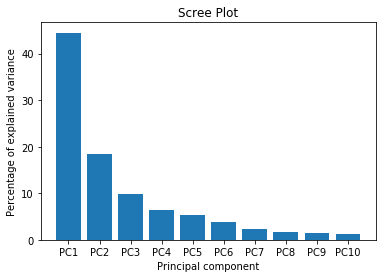

In [24]:
# can graphically represent % variation in each PC in a scree plot

# calculate % variation of each PC
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

# create labels for scree plot
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]

# now use matplotlib to create bar plot
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of explained variance")
plt.xlabel("Principal component")
plt.title("Scree Plot")
plt.show()

In [25]:
# get exact figures for % variance captured in each PC
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.44545454 0.1854487  0.09908318 0.06515676 0.05374362 0.03845634
 0.02331206 0.01590846 0.01413346 0.01166102]


This means that PC1 contains ~ 45% of the variance, PC2 ~19%, PC3 ~10% etc.

So, dropping down to 3D (instead of the original 32D), would capture ~ 74% of the variance in our data. 

If we want to capture 95%, PCA suggests that we can reduce the feature space from 32D to 10D. As principial components are *combinations* of features, we need to see a table to understand which features are most important to each PC.

In [26]:
# displaying the eigenvectors for each feature
principal_components = pd.DataFrame(data=pca.components_, index=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"], columns=["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"])
principal_components.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
PC1,0.217001,0.101030,0.225852,0.219644,0.156196,0.241937,0.258890,0.261435,0.138329,0.074362,...,0.227088,0.101926,0.235409,0.224919,0.133158,0.210618,0.228438,0.248853,0.123844,0.132667
PC2,-0.238487,-0.059761,-0.219451,-0.234225,0.177271,0.141687,0.059241,-0.040509,0.190460,0.366435,...,-0.222702,-0.047762,-0.203302,-0.220466,0.165019,0.132760,0.096251,-0.011536,0.135206,0.270399
PC3,-0.000317,0.051229,-0.001220,0.037775,-0.088349,-0.072260,0.005423,-0.019773,-0.034674,-0.020758,...,-0.045126,-0.060829,-0.046121,-0.008715,-0.263683,-0.248424,-0.178957,-0.170611,-0.278973,-0.244659
PC4,-0.044132,0.615202,-0.044150,-0.055516,-0.133301,-0.032215,-0.025204,-0.053383,-0.015429,-0.044959,...,-0.018443,0.641741,-0.016917,-0.029324,-0.008919,0.065854,0.046309,-0.010953,0.052525,0.059863
PC5,0.039674,0.008562,0.037964,0.007421,-0.337553,0.005809,0.089961,-0.029997,-0.347506,-0.044604,...,0.001344,-0.018355,0.008889,-0.024259,-0.280957,0.105701,0.184954,0.062619,-0.280153,0.079495


The eigenvector with the largest absolute value has the greatest effect on that PC.

So, for example, the features that affect PC1 the most are:
* Concave points mean (0.261)
* Concavity mean (0.258)
* Concave points worst (0.248)
* Compactness mean (0.241)

The feature with the least effect on PC1 would be fractal dimension mean (0.074).

In [27]:
# now we have investigated, can apply PCA transformation to train and test sets
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

### Now to apply logistic regression

In [28]:
# import the model we want to use
from sklearn.linear_model import LogisticRegression
# setting the solver cos it Jupyter didn't like it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [29]:
# training the model on the data - model is learning the relationship between features and classes
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# now to apply it to the test data
# model will predict the class based on what it has learned in the training
predictions = logisticRegr.predict(x_test)

In [31]:
print(predictions)
# can see it has predicted classes for the test data

[0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0
 0 1 0]


### Assessing model performance

For our target variable of diagnosis, benign is the negative class (0) and malignant is the positive class (1).

Of the metrics used to assess model performance (accuracy, precision, recall), **recall seems the most appropriate for this data**.

* Accuracy: the proportion of predictions a model gets right (TP + TN / TP + TN + FP + FN)

* Precision: the proportion of positive predictions a model gets right (TP / TP + FP)

* Recall: the proportion of actual positives that were identified correctly (TP / TP + FN)

**As we are predicting disease, we want to minimise false negatives. A false negative would be a tumour being classified as benign when in fact it is malignant, and therefore the breast cancer would go undiagnosed. To minimise false negatives, we want to increase recall.**

There is a 'tug of war' between precision (which aims to minimise false positives) and recall (which aims to minimise false negatives). The F1 score is the harmonic mean of both. A model with perfect precision and recall would have an F1 score of 1.

In [32]:
# let's look at the other metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [33]:
# creating a confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[69,  3],
       [ 2, 40]], dtype=int64)

Text(0.5, 15.0, 'Predicted class')

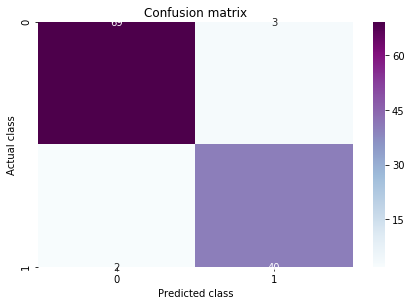

In [34]:
# making confusion matrix a heatmap

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

Predicted label 0 / actual label 0 = true negative  
Predicted label 0 / actual label 1 = false negative  
Predicted label 1 / actual label 1 = true positive  
Predicted label 1 / actual label 0 = false positive  

So this matrix is saying there are:
* 69 true negatives
* 2 false negatives
* 3 false positives
* 40 true positives

This model has the best rate of false negatives so far.

In [35]:
# try looking at the metrics for class 1 separately
# should be the same as classification report above, just makes it easier to read
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.956140350877193
Precision: 0.9302325581395349
Recall: 0.9523809523809523


Highest recall score so far.

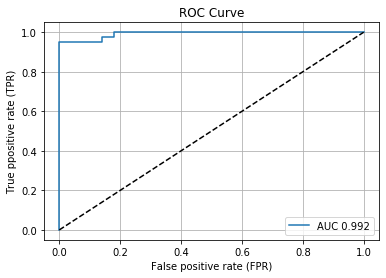

In [36]:
# attempting to plot an ROC curve

# first need to predict probability
# y_pred_proba is the predicted probability for a class in y_test dataset
# .predict_proba only gives the output of 1 in a binary classification (which is malignant, which is what we want)
# [:,1] also only gives the output for class 1
y_pred_proba = logisticRegr.predict_proba(x_test)[:,1]

# then this is plotting the ROC curve using y_test data (classes) and the predicted probability of getting class 1
# fpr is false positive rate on the x axis
# tpr is true positive rate on the y axis
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# calculating the AUC curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# plotting it on a graph

# plots x and y axes
plt.plot(fpr,tpr)
# plots legend as auc score
plt.legend(["AUC %.3f"%auc])
# plots labels / title
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True ppositive rate (TPR)")
plt.title("ROC Curve")
# adds a grid
plt.grid()
# adds the line for an AUC of 0.5, i.e. a useless classfier
plt.plot([0, 1], [0, 1], 'k--')
# shows plot
plt.show()

So to summarise

* This model has the highest recall so far (0.95)
* Also has the highest F1 score so far (0.94), indicating there is a good balance of precision and recall (even though we are most interested in recall)
* The AUC score is 0.992 and a perfect classifer is 1

That can't be right? It's saying this is a near perfect classifier...

## Go to my other notebook!
### Amber_model4_PCA_outliers_removed to see how removing outliers affects model performance.